In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV


In [2]:
Data_set = pd.read_csv("winequality-red.csv")

In [3]:
data = Data_set.copy()

In [4]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [7]:
rf = RandomForestClassifier()

In [8]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [9]:
rf.score(x_test,y_test)

0.6791666666666667

In [10]:
rf.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=810854418),
 DecisionTreeClassifier(max_features='auto', random_state=2003272111),
 DecisionTreeClassifier(max_features='auto', random_state=180067479),
 DecisionTreeClassifier(max_features='auto', random_state=648157573),
 DecisionTreeClassifier(max_features='auto', random_state=978569493),
 DecisionTreeClassifier(max_features='auto', random_state=266744120),
 DecisionTreeClassifier(max_features='auto', random_state=37154999),
 DecisionTreeClassifier(max_features='auto', random_state=1662908902),
 DecisionTreeClassifier(max_features='auto', random_state=578731095),
 DecisionTreeClassifier(max_features='auto', random_state=1279462289),
 DecisionTreeClassifier(max_features='auto', random_state=2020265527),
 DecisionTreeClassifier(max_features='auto', random_state=1550388541),
 DecisionTreeClassifier(max_features='auto', random_state=1683204947),
 DecisionTreeClassifier(max_features='auto', random_state=726186864),
 DecisionTreeCl

[Text(0.47145606289390757, 0.9722222222222222, 'X[10] <= 9.925\ngini = 0.672\nsamples = 711\nvalue = [7, 42, 438, 431, 177, 24]'),
 Text(0.19892331932773108, 0.9166666666666666, 'X[1] <= 0.587\ngini = 0.507\nsamples = 312\nvalue = [1, 20, 302, 146, 10, 0]'),
 Text(0.07261029411764706, 0.8611111111111112, 'X[7] <= 0.997\ngini = 0.579\nsamples = 156\nvalue = [1, 11, 120, 94, 10, 0]'),
 Text(0.029411764705882353, 0.8055555555555556, 'X[6] <= 57.0\ngini = 0.427\nsamples = 40\nvalue = [0, 5, 43, 11, 0, 0]'),
 Text(0.025210084033613446, 0.75, 'X[9] <= 0.515\ngini = 0.579\nsamples = 26\nvalue = [0, 5, 20, 11, 0, 0]'),
 Text(0.012605042016806723, 0.6944444444444444, 'X[5] <= 18.0\ngini = 0.58\nsamples = 8\nvalue = [0, 5, 4, 1, 0, 0]'),
 Text(0.008403361344537815, 0.6388888888888888, 'X[2] <= 0.015\ngini = 0.531\nsamples = 6\nvalue = [0, 5, 2, 1, 0, 0]'),
 Text(0.004201680672268907, 0.5833333333333334, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]'),
 Text(0.012605042016806723, 0.5833333

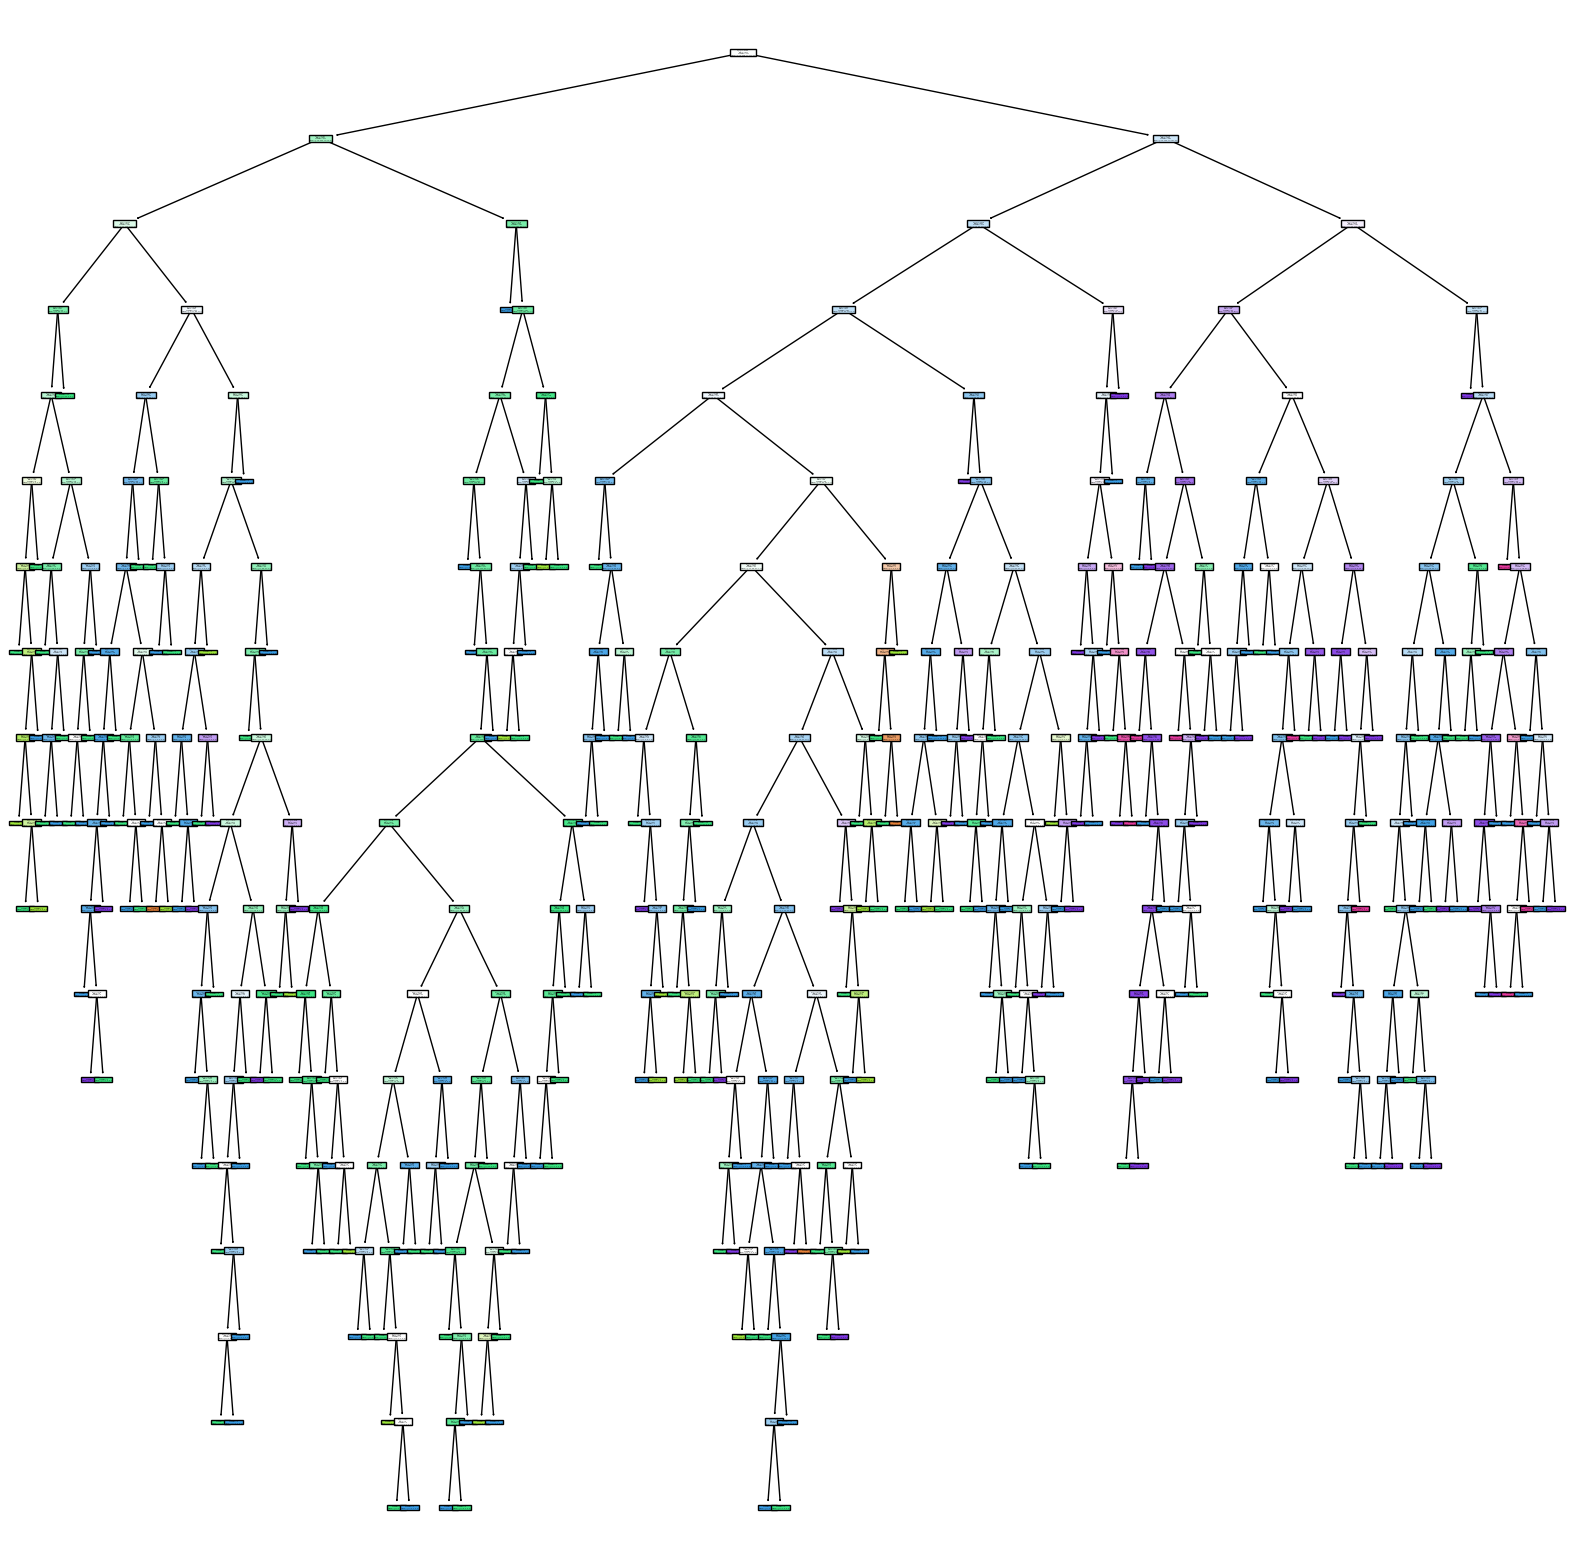

In [11]:
plt.figure(figsize=(20,20))
tree.plot_tree(rf.estimators_[0],filled=True)

##for i in range(len(rf.estimators_)):
    tree.plot_tree(rf.estimators_[i],filled=True)

In [32]:
grid_params = {'n_estimators': [5,10,50,100,120,150],
               'criterion': ['gini','entropy'],
               'max_depth': range(1,10,1),
               'min_samples_leaf':range(1,10,1)}


In [33]:
rf = RandomForestClassifier()

In [34]:
grid_search_rf = GridSearchCV(param_grid= grid_params, cv =10,n_jobs=6,verbose=1, estimator = rf)

In [35]:
grid_search_rf.fit(x_train,y_train)

Fitting 10 folds for each of 972 candidates, totalling 9720 fits


C:\Users\Vaibhav\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=6,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'n_estimators': [5, 10, 50, 100, 120, 150]},
             verbose=1)

In [36]:
grid_search_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [142]:
rf_new= RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,n_estimators=10 )

In [143]:
rf_new.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       n_estimators=10)

In [144]:
rf_new.score(x_test,y_test)

0.6104166666666667

In [145]:
rf_new.score(x_train,y_train)

0.6916890080428955